In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
%matplotlib inline
from sklearn.cross_validation import train_test_split

In [41]:
df = pd.read_csv('../other/frac_merge_peak.csv')

In [42]:
df.columns

Index([u'PropID', u'RSID', u'End_Date', u'Reservoir', u'Completed_Feet',
       u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing',
       u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster',
       u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster',
       u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate',
       u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure',
       u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', u'PROPNUM', u'XEC_FIELD',
       u'OPERATOR', u'COUNTY', u'STATE', u'M_LATITUDE', u'M_LONGITUDE',
       u'MAJOR', u'SPUD_DATE', u'FIRST_PROD', u'Wet_Gas_EUR', u'Dry_Gas_EUR',
       u'Oil_EUR', u'NGL_EUR', u'Days_Production', u'OIL_Peak',
       u'OIL_Days_to_Peak'],
      dtype='object')

In [45]:
X = df[[u'Clusters/Stage', u'Perfs/Cluster', u'#_of_Stages', u'ISIP/Ft', u'Rate/Ft', u'Rate/Perf', u'Avg_Prop_Conc', 
        u'Max_Prop_Conc', u'Rate/Cluster', u'Max_Rate', u'Cluster_Spacing', u'Avg_Pressure', u'Prop_Lbs/Ft', 
        u'Prop_Lbs/Perf', u'Max_Pressure', u'Fluid_Gal/Perf', u'Fluid_Gal/Ft', u'Prop_Lbs/Cluster', 
        u'Fluid_Gal/Cluster', u'XEC_FIELD', u'Reservoir']]
y = df[[u'OIL_Peak']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(133, 21)

In [46]:
data = dict(x=X_train.drop([u'XEC_FIELD', u'Reservoir'], axis=1), y=y_train)

with pm.Model() as model:
    pm.glm.glm('y ~ x', data)
    step = pm.NUTS()
    trace = pm.sample(2000, step, progressbar=True)

Applied log-transform to sd and added transformed sd_log_ to model.
100%|██████████| 2000/2000 [05:21<00:00,  6.45it/s]


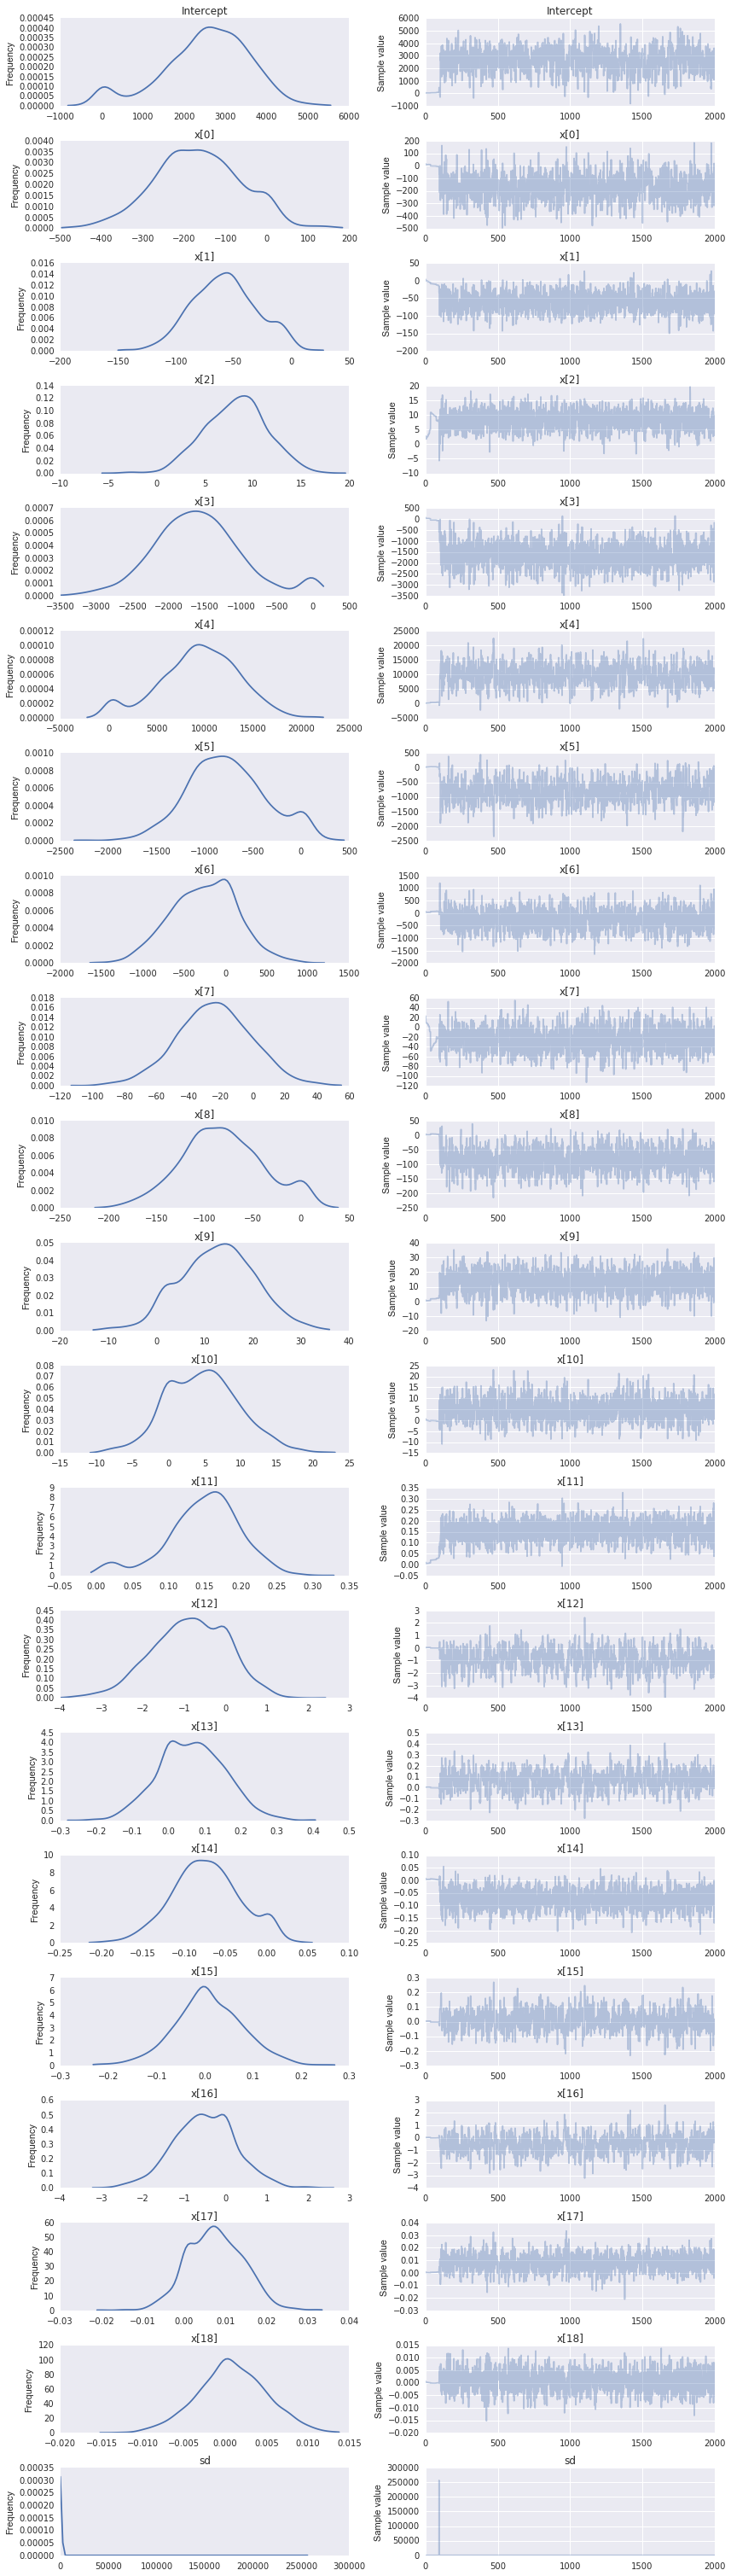

In [47]:
pm.traceplot(trace);

(-1000, 1000)

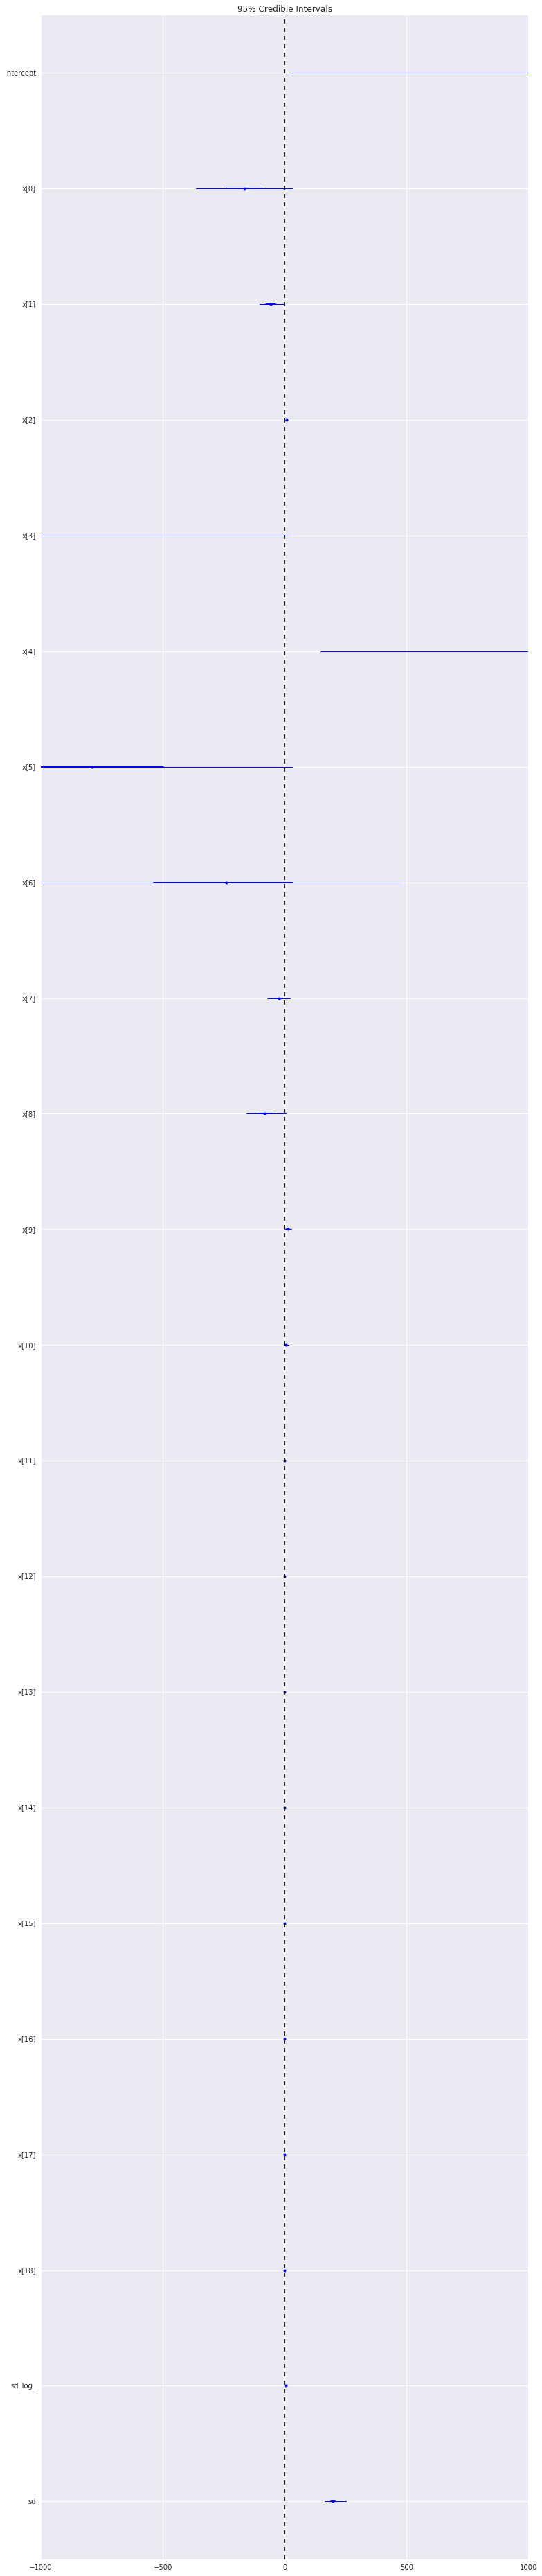

In [54]:
plt.figure(figsize=(12, 60))
pm.forestplot(trace)
plt.xlim(-1000, 1000)

In [ ]:
field = pd.Categorical(df['XEC_FIELD']).codes
reservoir = pd.Categorical(df['Reservoir']).codes